# Barplots

In [1]:
%matplotlib inline
from matplotlib import pyplot
import pandas

## Data description

We will use data on answers to the Big Five Personality Test, constructed with items from the International Personality Item Pool. Link: 
http://personality-testing.info/_rawdata/

This data was collected online with an interactive version of the Rosenberg Self-Esteem Scale (see Rosenberg, M. (1965). Society and the adolescent self-image. Princeton, NJ: Princeton University Press).

Individuals were informed at the start of the test that their data would be saved. When they completed the test they were asked to confirm that the responses they had given were accurate and could be used for research, only those who confirmed are included in this dataset (75.7% confirmed). 

The following items were rated on the following scale where 1=strongly disagree, 2=disagree, 3=agree, and 4=strongly agree (0=no answer):


Q1. I feel that I am a person of worth, at least on an equal plane with others.	
Q2. I feel that I have a number of good qualities.	
Q3. All in all, I am inclined to feel that I am a failure.	
Q4. I am able to do things as well as most other people.	
Q5. I feel I do not have much to be proud of.	
Q6. I take a positive attitude toward myself.	
Q7. On the whole, I am satisfied with myself.	
Q8. I wish I could have more respect for myself.	
Q9. I certainly feel useless at times.	
Q10. At times I think I am no good at all.

Some other questions were on the following page:

gender. Chosen from a drop down list (1=male, 2=female, 3=other; 0=none was chosen)
age. Entered as a free response. (0=response that could not be converted to integer)

And:

source. How the user came to the page (HTTP referer). 1=front page of personality test website, 2=Google search, 3=other.
country. Inferred from technical information using MaxMind GeoLite.

In [2]:
data = pandas.read_csv('data/rse.csv')
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,gender,age
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000
mean,2.306280,2.225118,2.220083,1.934242,2.235782,3.085012,2.189870,2.287026,2.454680,2.509182,23.447275,1.316943,31.303318
std,1.093998,1.079494,1.091581,1.044974,1.122473,0.990713,1.079272,1.098804,1.173165,1.197493,7.838984,0.482853,20.356289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,22.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,23.000000,1.000000,28.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,29.000000,2.000000,38.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000,3.000000,999.000000


In [9]:
data = data[data.age < 100]
data = data[data.age > 18]
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,gender,age
count,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000
mean,2.334953,2.232912,2.216715,1.928409,2.213800,3.080661,2.198575,2.283447,2.457402,2.529316,23.476190,1.302883,32.261743
std,1.095217,1.080904,1.087551,1.043633,1.115625,0.992342,1.076358,1.096005,1.167466,1.193401,7.832746,0.475520,11.202440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,23.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,23.000000,1.000000,29.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,29.000000,2.000000,39.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000,3.000000,85.000000


## Adding a total self-esteem estimate

In [10]:
data['summed'] = data.Q1 + data.Q2 - data.Q3 + data.Q4 - data.Q5 + data.Q6 + data.Q7 - data.Q8 - data.Q9 - data.Q10

## Creating a first barplot

In [20]:
data['age_group'] = round(data.age/10)

grp = data.groupby(['age_group'])
mns = mns.reset_index()
mns

,age_group,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,gender,age,summed
0,2.0,2.230981,2.159487,2.162236,1.962420,2.263978,3.096242,2.182401,2.281393,2.501375,2.418882,23.259395,1.400550,21.997250,0.003666
1,3.0,2.369936,2.221748,2.216418,1.926439,2.237740,3.083156,2.202559,2.349680,2.437100,2.599147,23.643923,1.300640,29.581023,-0.036247
2,4.0,2.457680,2.308777,2.336991,1.970219,2.238245,3.180251,2.271160,2.318182,2.496865,2.612853,24.191223,1.239812,39.625392,0.184953
3,5.0,2.260536,2.291188,2.114943,1.754789,1.973180,2.915709,2.111111,2.080460,2.291188,2.478927,22.272031,1.183908,49.306513,0.394636
4,6.0,2.419847,2.419847,2.290076,1.809160,2.000000,2.839695,2.137405,2.114504,2.374046,2.580153,22.984733,1.091603,58.679389,0.267176
5,7.0,2.761905,2.428571,2.333333,2.000000,2.238095,2.809524,2.238095,2.238095,2.523810,2.952381,24.523810,1.095238,69.190476,-0.047619
6,8.0,2.571429,2.000000,1.857143,1.571429,1.857143,2.714286,1.857143,1.428571,2.285714,2.428571,20.571429,1.142857,79.428571,0.857143


In [21]:
cnts = grp.count()
cnts

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,score,gender,age,summed
age_group,,,,,,,,,,,,,,
2.0,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
3.0,938,938,938,938,938,938,938,938,938,938,938,938,938,938
4.0,638,638,638,638,638,638,638,638,638,638,638,638,638,638
5.0,261,261,261,261,261,261,261,261,261,261,261,261,261,261
6.0,131,131,131,131,131,131,131,131,131,131,131,131,131,131
7.0,21,21,21,21,21,21,21,21,21,21,21,21,21,21
8.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7


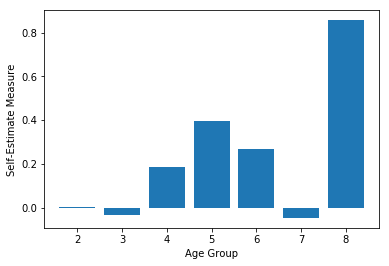

In [17]:
pyplot.bar(mns.age_group, mns.summed, align='center')

pyplot.xlabel('Age Group')
pyplot.ylabel('Self-Estimate Measure')

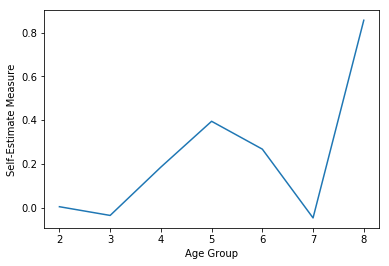

In [22]:
pyplot.plot(mns.age_group, mns.summed)
pyplot.xlabel('Age Group')
pyplot.ylabel('Self-Estimate Measure')

# Error Bars

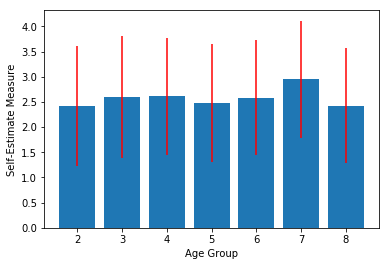

In [32]:
mns = grp.mean()
mns = mns.reset_index()

stds = grp.std()
stds = stds.reset_index()

pyplot.bar(mns.age_group, mns.Q10)
pyplot.errorbar(mns.age_group, mns.Q10, yerr=stds.Q10 , ls='none', color='red');
pyplot.xlabel('Age Group')
pyplot.ylabel('Self-Estimate Measure')

#pyplot.bar(mns.Q9, mns.Q10)
#

#pyplot.xlabel("'I certainly feel useless at times.'");
#pyplot.ylabel("'At times I think I am no good at all.'");

# Tick labels

Often, barplots are used to display data for different groups or categories. Therefore, you'll often want to label each bar.

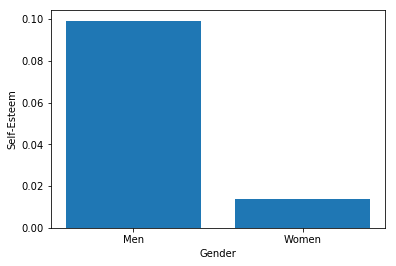

In [37]:
selected = data[data.gender > 0]
grp = selected.groupby(['gender'])
mns = grp.mean()
mns = mns.reset_index()

mns = mns[mns.gender.isin([1,2])]

pyplot.bar(mns.gender, mns.summed)
pyplot.xlabel('Gender')
pyplot.ylabel('Self-Esteem')

pyplot.xticks([1, 2], ['Men','Women']);

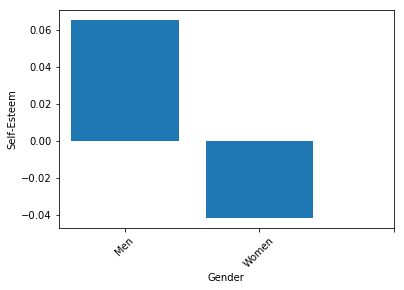

In [10]:
selected = data[data.gender > 0]
grp = selected.groupby(['gender'])
mns = grp.mean()
mns = mns.reset_index()

mns = mns[mns.gender.isin([1,2])]

pyplot.bar(mns.gender, mns.summed)
pyplot.xlabel('Gender')
pyplot.ylabel('Self-Esteem')

pyplot.xticks([1, 2, 3], ['Men', 'Women'], rotation=45);


# Excersises

German health registry for the year 1984. A data frame with 3,874 observations on the following 17 variables.

+ docvis: number of visits to doctor during year (0-121)
+ hospvis: number of days in hospital during year (0-51)
+ edlevel: educational level (categorical: 1-4)
+ age: age: 25-64
+ outwork: out of work=1; 0=working
+ female: female=1; 0=male
+ married: married=1; 0=not married
+ kids: have children=1; no children=0
+ hhninc: household yearly income in marks (in Marks)
+ educ: years of formal education (7-18)
+ self: self-employed=1; not self employed=0
+ edlevel1: (1/0) not high school graduate
+ edlevel2: (1/0) high school graduate
+ edlevel3: (1/0) university/college
+ edlevel4:(1/0) graduate school

http://tinyurl.com/ycgkd4x6

To do:

+ Create a table listing the average income for each educational level. Plot the data as barplot. Label the bars and the y-axis.
+ On top of the previous barplot, plot a line depicting the average number of doctor visits as a function of educational level.
+ Make a figure with two barplots. The left (right) barplot shows the average income for women (men) as a function of their educlevel.
+ Make a figure with two barplots. The left (right) barplot show the proportion of married women (men) as a function of their self-employment status.

In [11]:
%matplotlib inline
import pandas
from matplotlib import pyplot

data = pandas.read_csv('http://tinyurl.com/ycgkd4x6', index_col=0)
data.head()

,docvis,hospvis,edlevel,age,outwork,female,married,kids,hhninc,educ,self,edlevel1,edlevel2,edlevel3,edlevel4
1,1,0,3,54,0,0,1,0,3.050,15.0,0,0,0,1,0
2,0,0,1,44,1,1,1,0,3.050,9.0,0,1,0,0,0
3,0,0,1,58,1,1,0,0,1.434,11.0,0,1,0,0,0
4,7,2,1,64,0,0,0,0,1.500,10.5,0,1,0,0,0
5,6,0,3,30,1,0,0,0,2.400,13.0,0,0,0,1,0
